In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
df = pd.read_csv("Exam_Score_Prediction.csv")

In [10]:
df.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [11]:
df.shape

(20000, 13)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB


In [14]:
df.isna().sum()

student_id          0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64

# EDA

## Gender

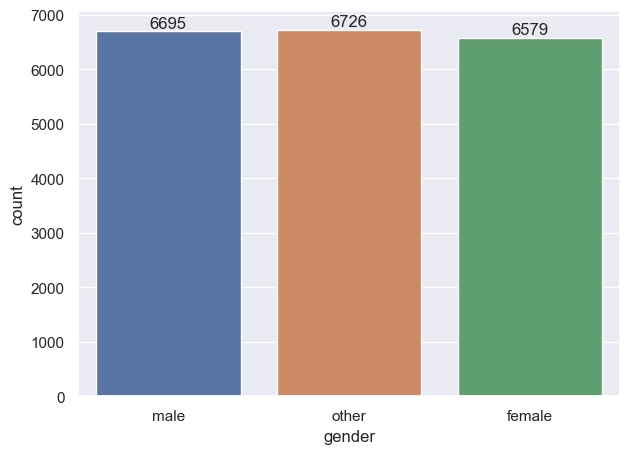

In [145]:
sns.set(rc={'figure.figsize':(7,5)})
ax = sns.countplot(data = df, x = 'gender', hue = 'gender')

for bars in ax.containers:
    ax.bar_label(bars)

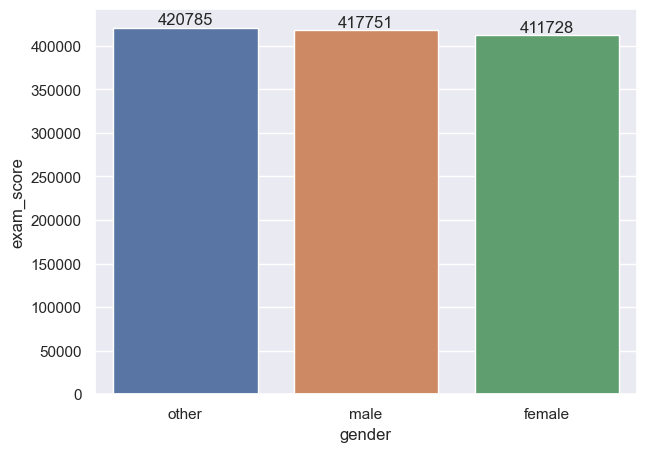

In [144]:
marksGen = df.groupby(['gender'], as_index=False)['exam_score'].sum().sort_values(by = 'gender', ascending = False)

sns.set(rc={'figure.figsize':(7,5)})
ax = sns.barplot(data = marksGen, x = 'gender', y = 'exam_score', hue = 'gender')

for bars in ax.containers:
    ax.bar_label(bars)

In [68]:
df.columns

Index(['student_id', 'age', 'gender', 'course', 'study_hours',
       'class_attendance', 'internet_access', 'sleep_hours', 'sleep_quality',
       'study_method', 'facility_rating', 'exam_difficulty', 'exam_score'],
      dtype='object')

<Axes: xlabel='course', ylabel='exam_score'>

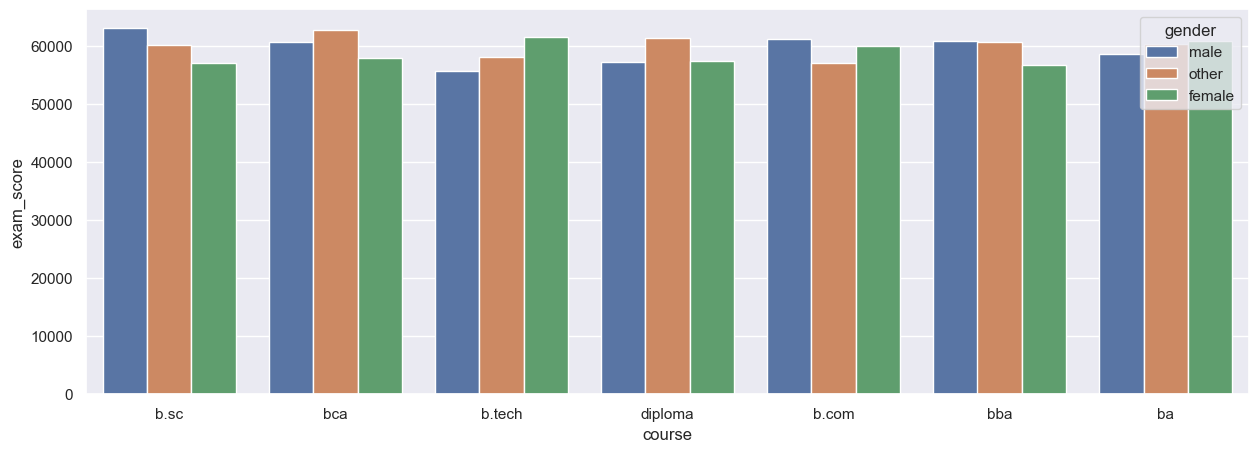

In [69]:
marksGC = df.groupby(['gender', 'course'], as_index = False)['exam_score'].sum().sort_values(by = 'exam_score',ascending = False)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = marksGC, x = 'course', y = 'exam_score', hue = 'gender')

## sleep_hours

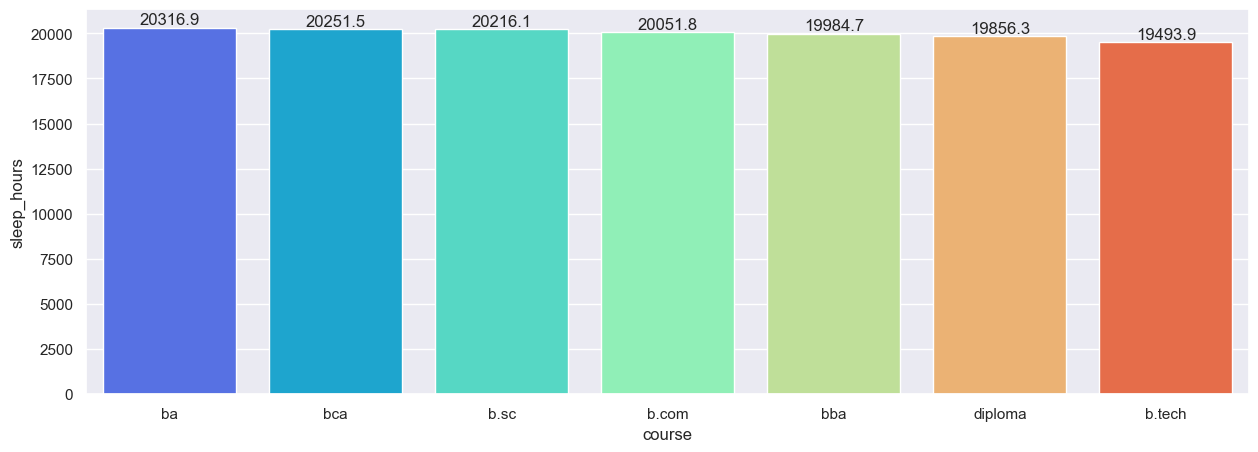

In [70]:
slphr = df.groupby(['course'], as_index = False)['sleep_hours'].sum().sort_values(by = 'sleep_hours', ascending = False)

sns.set(rc={'figure.figsize':(15,5)})
ax = sns.barplot(data = slphr,x = 'course',y = "sleep_hours", hue = 'course', palette = 'rainbow')

for bars in ax.containers:
    ax.bar_label(bars)

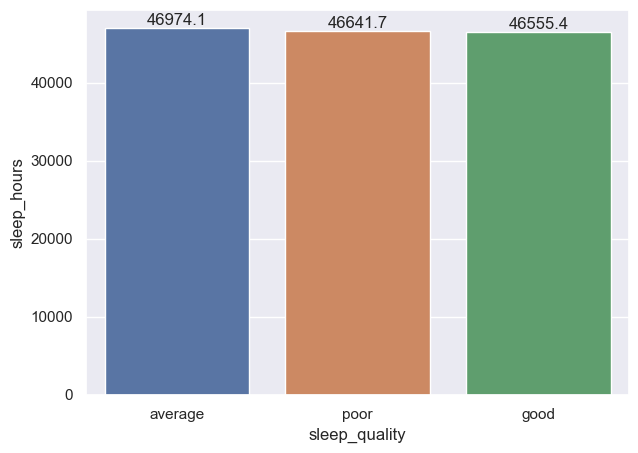

In [82]:
slphr = df.groupby(['sleep_quality'], as_index = False)['sleep_hours'].sum().sort_values(by = 'sleep_hours', ascending = False)

sns.set(rc={'figure.figsize':(7,5)})
ax = sns.barplot(data = slphr, x = 'sleep_quality', y = 'sleep_hours', hue = 'sleep_quality', )

for bars in ax.containers:
    ax.bar_label(bars)

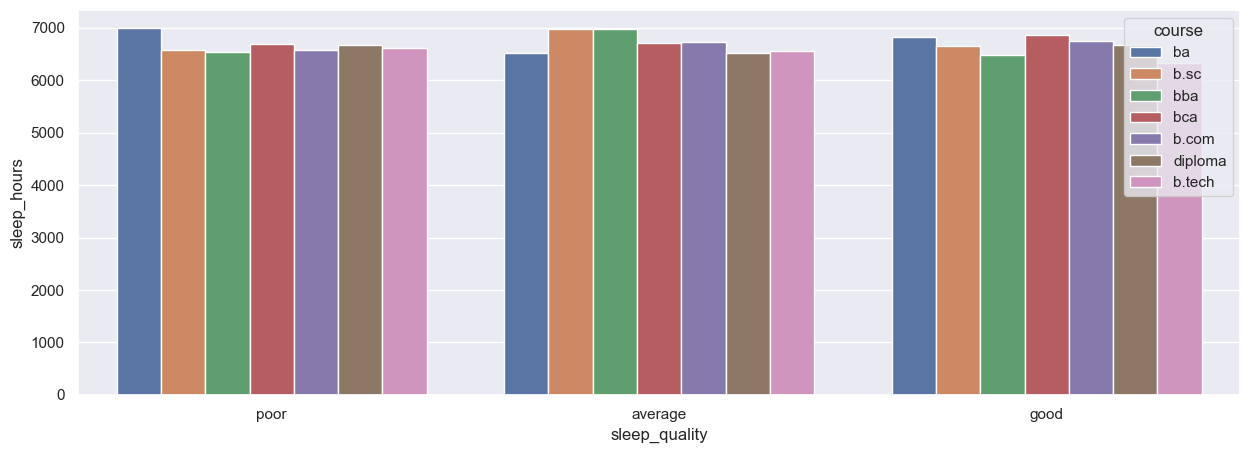

In [88]:
slphr = df.groupby(['sleep_quality', 'course'], as_index = False)['sleep_hours'].sum().sort_values(by = 'sleep_hours', ascending = False)

sns.set(rc={'figure.figsize':(15,5)})
ax = sns.barplot(data = slphr, x = 'sleep_quality', y = 'sleep_hours', hue = 'course')

## study_method

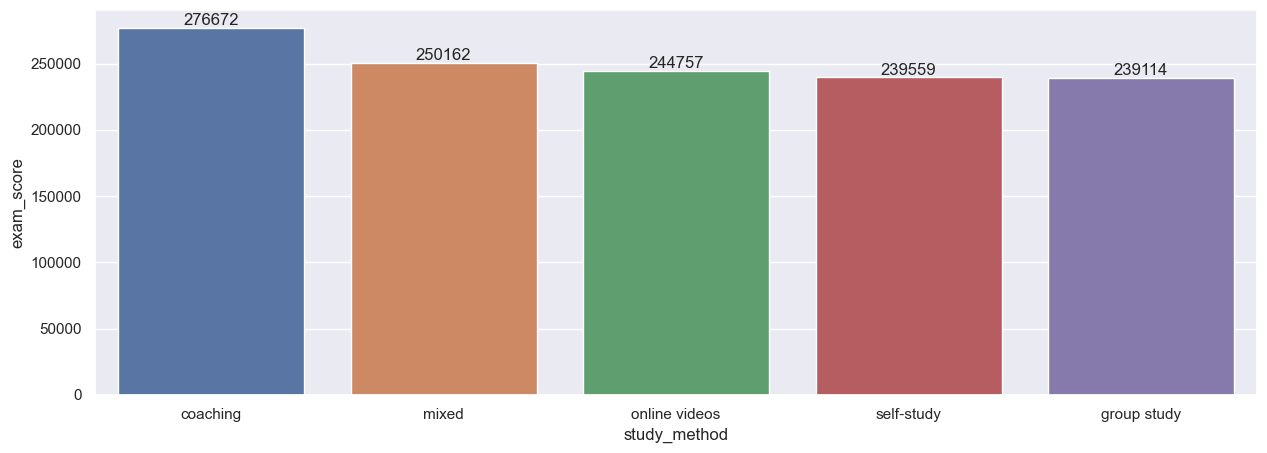

In [93]:
stdmt = df.groupby('study_method', as_index = False)['exam_score'].sum().sort_values(by = 'exam_score', ascending = False)

ax  = sns.barplot(data = stdmt, x = 'study_method', y = 'exam_score', hue = 'study_method')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='study_method', ylabel='exam_score'>

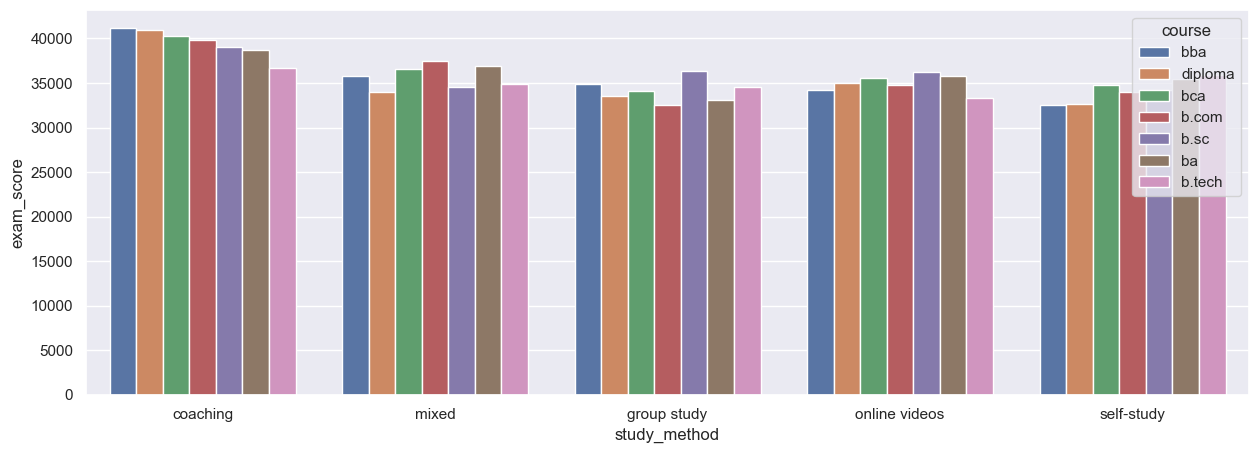

In [107]:
stdmt = df.groupby(['study_method', 'course'], as_index = False)['exam_score'].sum().sort_values(by = 'exam_score', ascending = False)

sns.barplot(data = stdmt, x = 'study_method', y = 'exam_score', hue = 'course')

## facility_rating

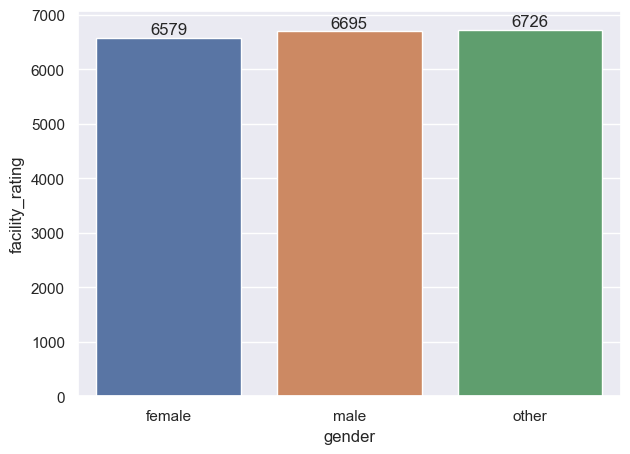

In [118]:
fcrt = df.groupby(['gender'], as_index = False)['facility_rating'].count()

sns.set(rc={'figure.figsize':(7,5)})
ax = sns.barplot(data = fcrt, x = 'gender', y = 'facility_rating', hue = 'gender')

for bars in ax.containers:
    ax.bar_label(bars)

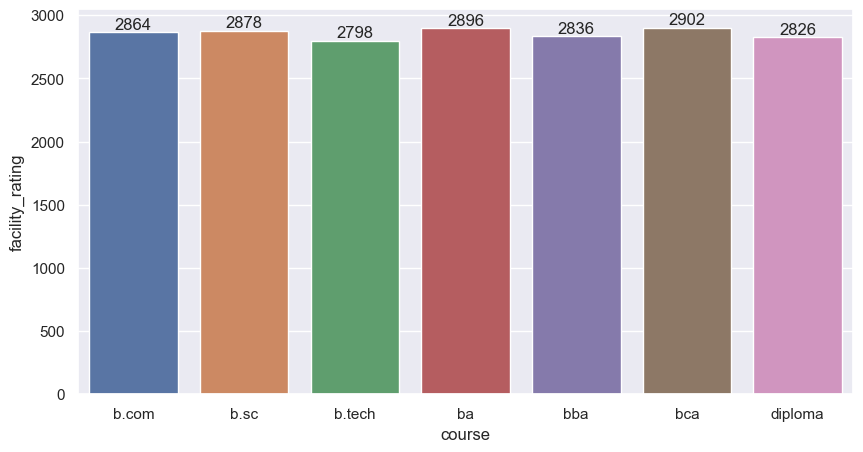

In [126]:
fcrt = df.groupby(['course'], as_index = False)['facility_rating'].count()

sns.set(rc={'figure.figsize':(10,5)})
ax = sns.barplot(data = fcrt, x = 'course', y = 'facility_rating', hue = 'course')

for bars in ax.containers:
    ax.bar_label(bars)

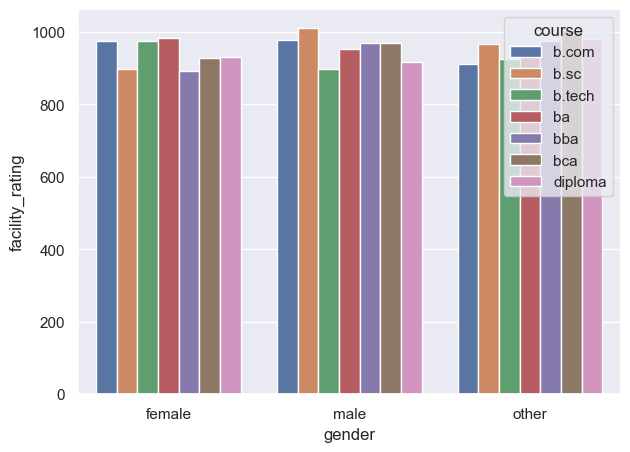

In [123]:
fcrt = df.groupby(['gender', 'course'], as_index = False)['facility_rating'].count()

sns.set(rc={'figure.figsize':(7,5)})
ax = sns.barplot(data = fcrt, x = 'gender', y = 'facility_rating', hue = 'course')

## class_attendance

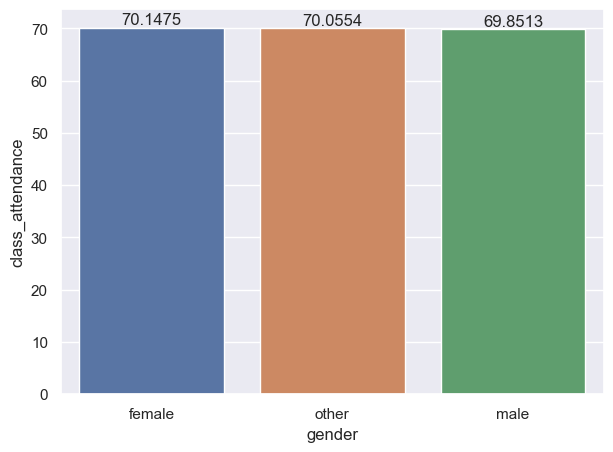

In [137]:
clatd = df.groupby('gender', as_index = False)['class_attendance'].mean().sort_values(by = 'class_attendance', ascending = False)

sns.set(rc={'figure.figsize':(7,5)})
ax = sns.barplot(data = clatd, x = 'gender', y = 'class_attendance', hue = 'gender')

for bars in ax.containers:
    ax.bar_label(bars)

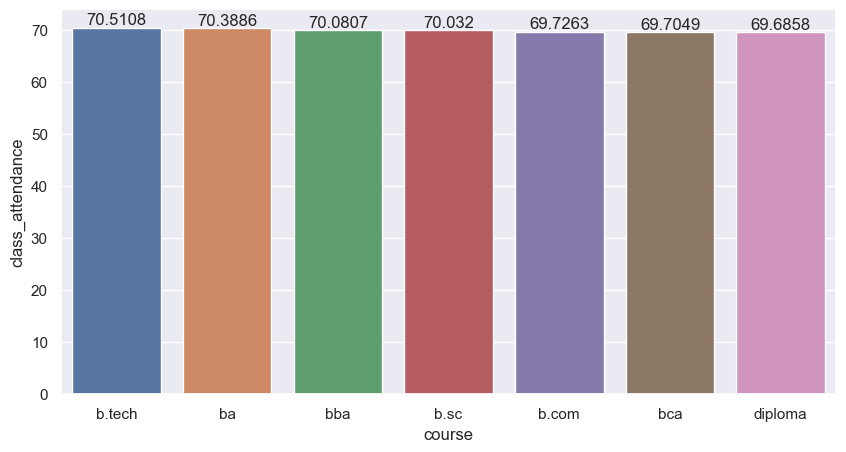

In [138]:
clatd = df.groupby('course', as_index = False)['class_attendance'].mean().sort_values(by = 'class_attendance', ascending = False)

sns.set(rc={'figure.figsize':(10,5)})
ax = sns.barplot(data = clatd, x = 'course', y = 'class_attendance', hue = 'course')

for bars in ax.containers:
    ax.bar_label(bars)

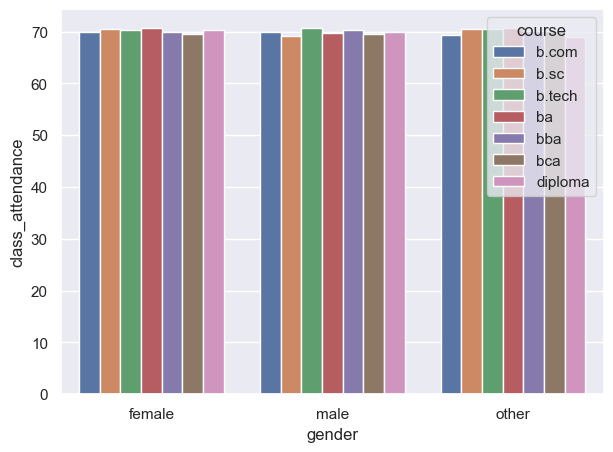

In [143]:
fcrt = df.groupby(['gender', 'course'], as_index = False)['class_attendance'].mean()

sns.set(rc={'figure.figsize':(7,5)})
ax = sns.barplot(data = fcrt, x = 'gender', y = 'class_attendance', hue = 'course')